In [1]:
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d  # noqa: F401
import numpy as np
import pandas as pd
from sklearn import datasets

In [2]:
# Load Dataset

iris = datasets.load_iris()

X = iris.data
y = iris.target

data_mean = X.mean(axis=0)
data_std = X.std(axis=0)

X_scaled = (X - data_mean) / data_std

print(f'Shape of X_scaled: {X_scaled.shape}')
features = X_scaled.T
print(f'Shape of features: {features.shape}')
cov_matrix = np.cov(features)
print(f'Shape of cov_matrix: {cov_matrix.shape}')
print('\nSneak Peak of the covariance matrix:\n')
print(f'covariance matrix : {cov_matrix}')
print('\n\n')

Shape of X_scaled: (150, 4)
Shape of features: (4, 150)
Shape of cov_matrix: (4, 4)

Sneak Peak of the covariance matrix:

covariance matrix : [[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]





 Eigenvalues: [2.93808505 0.9201649  0.14774182 0.02085386]


 Eigenvectors: [[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


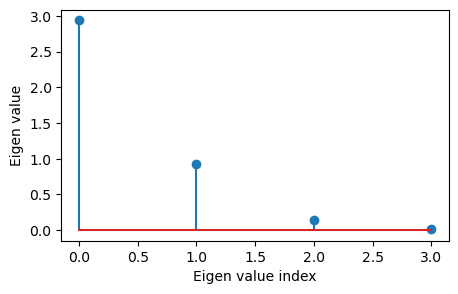

In [3]:
#  Eigen decomposition
eig_values, eig_vectors = np.linalg.eig(cov_matrix)
print(f' Eigenvalues: {eig_values}')
print(f'\n\n Eigenvectors: {eig_vectors}')

plt.figure(figsize=(5, 3))
plt.stem(eig_values, use_line_collection=True)
plt.xlabel('Eigen value index')
plt.ylabel('Eigen value')
plt.show()

In [4]:
for i, eig_value in enumerate(eig_values):
    exp_var = np.sum(eig_value * 100 / np.sum(eig_values))
    print(f'Eigenvectors upto {i + 1} expresses {exp_var} % variance')

PC_1 = X_scaled.dot(eig_vectors.T[0])
PC_2 = X_scaled.dot(eig_vectors.T[1])
projected_2d = pd.DataFrame(PC_1, columns=['PC1'])
projected_2d['PC2'] = PC_2
projected_2d['Y'] = y
print(projected_2d.head())

Eigenvectors upto 1 expresses 72.96244541329989 % variance
Eigenvectors upto 2 expresses 22.850761786701753 % variance
Eigenvectors upto 3 expresses 3.668921889282865 % variance
Eigenvectors upto 4 expresses 0.5178709107154905 % variance
        PC1       PC2  Y
0 -2.264703 -0.480027  0
1 -2.080961  0.674134  0
2 -2.364229  0.341908  0
3 -2.299384  0.597395  0
4 -2.389842 -0.646835  0


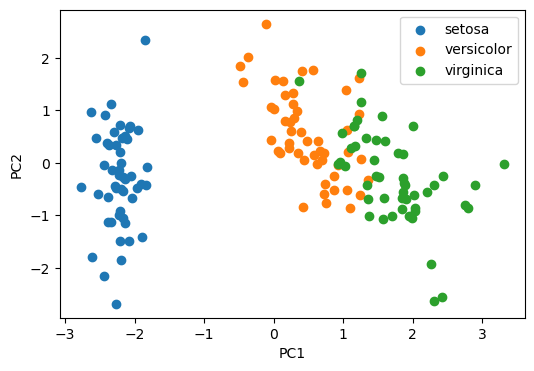

In [5]:
plt.figure(figsize=(6,4))
for label in np.unique(y):
    label_name = iris.target_names[label]
    coords = projected_2d[projected_2d['Y'] == label]
    x = coords['PC1'].values
    y = coords['PC2'].values
    plt.scatter(x, y, label=label_name)
    plt.xlabel('PC1')
    plt.ylabel('PC2')

plt.legend()
plt.show()